In [1]:
import imageio
import glob
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
path = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Train/Train/"

In [4]:
genders = ['Male', 'Female']
frmt = "png"

In [5]:
def imgtodataset(path, genders, frmt):
    data_l = []
    label_l = []
    
    for i in range(len(genders)):
        for im_path in glob.glob(path + genders[i] + "/*." + frmt):
            im = imageio.imread(im_path)
            arr = np.array(im)
            data_l.append(arr)
            label_l.append(i)

    data = np.array(data_l)
    label = np.array(label_l)        
    
    return data, label

In [6]:
data, label = imgtodataset(path, genders, frmt)

In [15]:
## np.savez('training_data.npz', data, label)
path2 = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Test/Test/"

In [16]:
val_data, val_label = imgtodataset(path2, genders, frmt)

In [7]:
data_pp = tf.keras.applications.vgg16.preprocess_input(
        data, data_format=None
    )

In [17]:
val_data_pp =  tf.keras.applications.vgg16.preprocess_input(
        val_data, data_format=None
    )

In [20]:
base_vgg_model = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(100,100,3), pooling=max, classes=2)

In [21]:
base_vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [22]:
base_vgg_model.trainable = False

In [23]:
inputs = keras.Input(shape=(100, 100, 3))

In [29]:
x = base_vgg_model(inputs, training=False)

In [30]:
x = keras.layers.Flatten()(x)

In [31]:
x_1 = keras.layers.Dense(64)(x)
outputs_1 = keras.layers.Dense(1, activation='sigmoid')(x_1)
model_1 = keras.Model(inputs, outputs_1)

In [45]:
model_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [46]:
history_1 = model_1.fit(data_pp, label, epochs=5, validation_data=(val_data_pp, val_label))

Epoch 1/5


C:\Users\karni\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


348/348 [==============================] - 378s 1s/step - loss: 0.3027 - binary_accuracy: 0.8950 - accuracy: 0.0142 - auc_3: 0.9549 - precision_3: 0.8914 - recall_3: 0.8833 - true_positives_3: 4603.0000 - true_negatives_3: 5363.0000 - false_positives_3: 561.0000 - false_negatives_3: 608.0000 - val_loss: 0.3550 - val_binary_accuracy: 0.8796 - val_accuracy: 0.0023 - val_auc_3: 0.9409 - val_precision_3: 0.8734 - val_recall_3: 0.8108 - val_true_positives_3: 407.0000 - val_true_negatives_3: 718.0000 - val_false_positives_3: 59.0000 - val_false_negatives_3: 95.0000
Epoch 2/5
348/348 [==============================] - 410s 1s/step - loss: 0.2015 - binary_accuracy: 0.9226 - accuracy: 0.0021 - auc_3: 0.9750 - precision_3: 0.9253 - recall_3: 0.9079 - true_positives_3: 4731.0000 - true_negatives_3: 5542.0000 - false_positives_3: 382.0000 - false_negatives_3: 480.0000 - val_loss: 0.3074 - val_binary_accuracy: 0.8890 - val_accuracy: 0.0000e+00 - val_auc_3: 0.9432 - val_precision_3: 0.8750 - val_rec

In [34]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 15,009,729
Trainable params: 295,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [47]:
history_1.history

{'loss': [0.3027297258377075,
  0.20153750479221344,
  0.19245243072509766,
  0.19137632846832275,
  0.178711399435997],
 'binary_accuracy': [0.8950157165527344,
  0.9225864410400391,
  0.9267175793647766,
  0.9272564053535461,
  0.9316569566726685],
 'accuracy': [0.014189492911100388,
  0.0020655591506510973,
  0.004669959656894207,
  0.004849573597311974,
  0.007992815226316452],
 'auc_3': [0.9548673629760742,
  0.9750370979309082,
  0.9771299958229065,
  0.9777572751045227,
  0.980262815952301],
 'precision_3': [0.891363263130188,
  0.9252884984016418,
  0.9282791018486023,
  0.9263708591461182,
  0.9305340647697449],
 'recall_3': [0.8833237290382385,
  0.9078871607780457,
  0.914027988910675,
  0.9174822568893433,
  0.9228554964065552],
 'true_positives_3': [4603.0, 4731.0, 4763.0, 4781.0, 4809.0],
 'true_negatives_3': [5363.0, 5542.0, 5556.0, 5544.0, 5565.0],
 'false_positives_3': [561.0, 382.0, 368.0, 380.0, 359.0],
 'false_negatives_3': [608.0, 480.0, 448.0, 430.0, 402.0],
 'val

In [48]:
# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'binary_accuracy', 'accuracy', 'auc_3', 'precision_3', 'recall_3', 'true_positives_3', 'true_negatives_3', 'false_positives_3', 'false_negatives_3', 'val_loss', 'val_binary_accuracy', 'val_accuracy', 'val_auc_3', 'val_precision_3', 'val_recall_3', 'val_true_positives_3', 'val_true_negatives_3', 'val_false_positives_3', 'val_false_negatives_3'])


In [49]:
import matplotlib.pyplot as plt


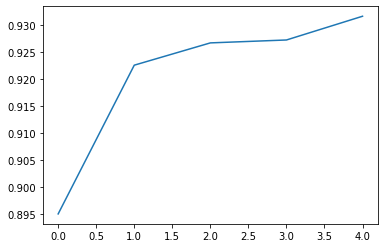

In [50]:
# summarize history for accuracy
plt.plot(history_1.history['binary_accuracy'])

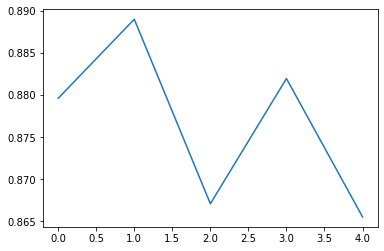

In [51]:
plt.plot(history_1.history['val_binary_accuracy'])

In [52]:
model_1_2 = keras.Model(inputs, outputs_1)
model_1_2.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), 
                    keras.metrics.FalseNegatives()])

In [53]:
history_1_2 = model_1_2.fit(data_pp, label, epochs=20, validation_data=(val_data_pp, val_label))

Epoch 1/20
348/348 [==============================] - 321s 917ms/step - loss: 0.3804 - binary_accuracy: 0.9209 - accuracy: 0.2128 - auc_4: 0.9635 - precision_4: 0.9163 - recall_4: 0.9144 - true_positives_4: 4765.0000 - true_negatives_4: 5489.0000 - false_positives_4: 435.0000 - false_negatives_4: 446.0000 - val_loss: 1.1554 - val_binary_accuracy: 0.8640 - val_accuracy: 0.1892 - val_auc_4: 0.9021 - val_precision_4: 0.8166 - val_recall_4: 0.8426 - val_true_positives_4: 423.0000 - val_true_negatives_4: 682.0000 - val_false_positives_4: 95.0000 - val_false_negatives_4: 79.0000
Epoch 2/20
348/348 [==============================] - 333s 956ms/step - loss: 0.4135 - binary_accuracy: 0.9229 - accuracy: 0.2316 - auc_4: 0.9641 - precision_4: 0.9186 - recall_4: 0.9165 - true_positives_4: 4776.0000 - true_negatives_4: 5501.0000 - false_positives_4: 423.0000 - false_negatives_4: 435.0000 - val_loss: 0.9760 - val_binary_accuracy: 0.8507 - val_accuracy: 0.1681 - val_auc_4: 0.9020 - val_precision_4: 0.

InvalidArgumentError:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (model_3/dense_4/Sigmoid:0) = ] [[-nan][-nan][-nan]...] [y (Cast_11/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/else/_1/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_38720]

Function call stack:
train_function


In [41]:
x_2 = keras.layers.Dense(256, activation= 'relu')(x)
x_2 = keras.layers.Dense(128, activation= 'relu')(x_2)
outputs_2 = keras.layers.Dense(1, activation='sigmoid')(x_2)
model_2 = keras.Model(inputs, outputs_2)

In [42]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 15,927,617
Trainable params: 1,212,929
Non-trainable params: 14,714,688
_______________________________________